#### Carga de módulos.

In [1]:
import numpy as np
import pandas as pd
import spacy
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob

In [2]:
nlp=spacy.load('es_core_news_sm')

#### Carga de Datos.  
coms = Comentarios  
POS = Positivo = 1  
NEU = Neutro = 0  
NEG = Negativo = -1  


In [3]:
df=pd.read_csv('NLP-Data.csv')

In [4]:
df.shape

(1501, 2)

In [5]:
df['sent'].unique()

array(['NEG', 'NEU', 'POS'], dtype=object)

In [6]:
df.head()

,coms,sent
0,> PD: que insoportables las focas camporistas ...,NEG
1,Lo de las jubilaciones de privilegio es para a...,NEU
2,"Como anti Milei que soy, admito:\n\n- Es loabl...",NEU
3,Siempre dos metros adelante Milei,POS
4,adhiero malisimo de una hora y media que duro ...,NEG


#### Consignas.  

1) Utilizar las técnicas vistas en clases para limpiar el texto y crear variables que ayuden a nuestro modelo a entender cuando un post corresponde a cada clase.  

2)  Utilizar modelo para predecir 100 post random (no utilizados para el entrenamiento, obviamente) y analizar los resultados.  


##### Codificación de variable objetivo

In [7]:
sent_op = {'NEG': -1, 'NEU': 0, 'POS': 1}

# Reemplazar las etiquetas por los valores codificados
df['sent'].replace(sent_op,inplace=True)

df.head()

,coms,sent
0,> PD: que insoportables las focas camporistas ...,-1
1,Lo de las jubilaciones de privilegio es para a...,0
2,"Como anti Milei que soy, admito:\n\n- Es loabl...",0
3,Siempre dos metros adelante Milei,1
4,adhiero malisimo de una hora y media que duro ...,-1


In [8]:
def cleanComms(texto,nlp):

    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-zA-Záéíóúüñ\s]','', texto)
    tokens = nlp(texto)

    # Filtrar stopwords y aplicar lematización
    lemas = [token.lemma_.lower() for token in tokens if not token.is_stop]
    texto_limpio = ' '.join(lemas)
    
    #Quitar espacios multiples que pueden generarse.
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)
    texto_limpio=texto_limpio.strip()
    return texto_limpio


In [9]:
texto = df.coms[1]
cleanComms(texto,nlp)

'jubilación privilegio milei alcanzariar milei vice noma'

In [10]:
df.coms[1]

'Lo de las jubilaciones de privilegio es para adelante, o sea de Milei hoy por hoy lo alcanzaria a Milei y su vice nomas.'

In [11]:
nlp(df.coms[1])[18].lemma_

'alcanzariar'

In [12]:
# Aplicar limpieza a los comentarios
df['coms_limpios'] = df['coms'].apply(cleanComms,nlp=nlp)

In [13]:
df.head()

,coms,sent,coms_limpios
0,> PD: que insoportables las focas camporistas ...,-1,pd insoportable foca camporista aplaudidora le...
1,Lo de las jubilaciones de privilegio es para a...,0,jubilación privilegio milei alcanzariar milei ...
2,"Como anti Milei que soy, admito:\n\n- Es loabl...",0,anti milei admito loable medida reducir elimin...
3,Siempre dos metros adelante Milei,1,metro milei
4,adhiero malisimo de una hora y media que duro ...,-1,adhiero malisimo hora medio duro haber él term...


In [14]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['coms_limpios'], df['sent'], test_size=0.066, random_state=42)
display(X_test.shape)
display(y_test.shape)

(100,)

(100,)

In [15]:
#Entrenar un modelo y realizar predicciones
# Crear la matriz de términos del documento
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [16]:
X_train_vect.shape

(1401, 9848)

In [17]:
svc = SVC(C = 10, kernel = 'rbf', random_state = 0)
svc.fit(X_train_vect, y_train)

SVC(C=10, random_state=0)

In [18]:
y_pred = svc.predict(X_test_vect)

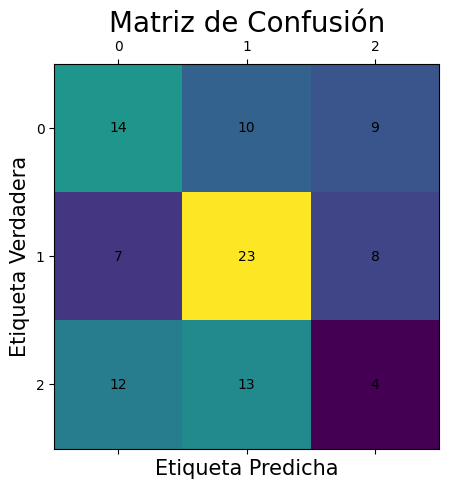

In [19]:
# Matriz de confusión 

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.42      0.42      0.42        33
           0       0.50      0.61      0.55        38
           1       0.19      0.14      0.16        29

    accuracy                           0.41       100
   macro avg       0.37      0.39      0.38       100
weighted avg       0.39      0.41      0.39       100



In [21]:

# Inicializar el TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Aplicar el TfidfVectorizer a la columna 'texto'
X_train_tf = tfidf_vectorizer.fit_transform(X_train)
X_test_tf = tfidf_vectorizer.transform(X_test)

In [22]:
svctf = SVC(C = 10, kernel = 'rbf', random_state = 0)
svctf.fit(X_train_tf, y_train)

SVC(C=10, random_state=0)

In [23]:
y_pred_tf = svctf.predict(X_test_tf)

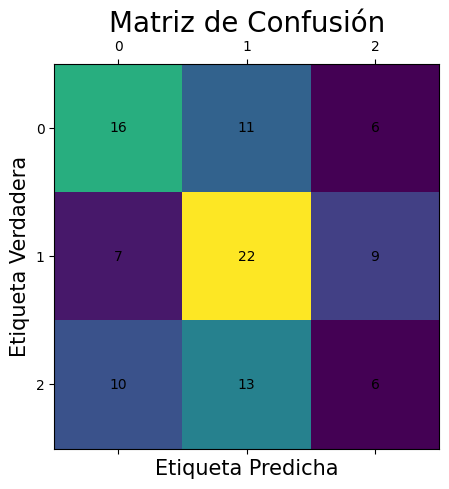

In [24]:
# Matriz de confusión 

cmtf = confusion_matrix(y_test, y_pred_tf)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cmtf)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cmtf):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

In [25]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

          -1       0.48      0.48      0.48        33
           0       0.48      0.58      0.52        38
           1       0.29      0.21      0.24        29

    accuracy                           0.44       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.42      0.44      0.43       100



In [87]:

# Entrenar un modelo de regresión logística
logis = LogisticRegression(max_iter=28)  # Aumentar max_iter si es necesario
logis.fit(X_train_tf, y_train)

LogisticRegression(max_iter=28)

In [88]:
# Utilizar el modelo para predecir
y_pred_logis = logis.predict(X_test_tf)

In [89]:
# Utilizar el modelo para predecir
y_pred_logis_t = logis.predict(X_train_tf)

In [92]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

          -1       0.47      0.42      0.44        33
           0       0.48      0.61      0.53        38
           1       0.32      0.24      0.27        29

    accuracy                           0.44       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.43      0.44      0.43       100



In [90]:
# Imprimir el reporte de clasificación
print(classification_report(y_train, y_pred_logis_t))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       448
           0       0.92      0.99      0.95       558
           1       0.98      0.90      0.94       395

    accuracy                           0.95      1401
   macro avg       0.95      0.95      0.95      1401
weighted avg       0.95      0.95      0.95      1401



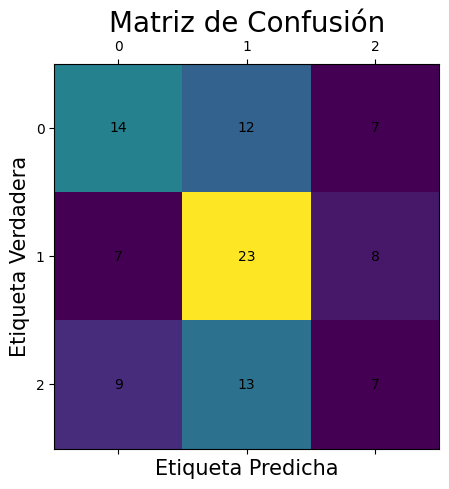

In [28]:
# Matriz de confusión 

cmlogis = confusion_matrix(y_test, y_pred_logis)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cmlogis)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cmlogis):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

In [29]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

          -1       0.47      0.42      0.44        33
           0       0.48      0.61      0.53        38
           1       0.32      0.24      0.27        29

    accuracy                           0.44       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.43      0.44      0.43       100



In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

X_train_tfa=X_train_tf.toarray()
X_test_tfa=X_test_tf.toarray()
y_train_c = y_train + 1

def lr_variable(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * 0.1

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_tfa.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir el programador de la tasa de aprendizaje
lr_scheduler = LearningRateScheduler(lr_variable)

# Entrenar el modelo
early_stopping = EarlyStopping(patience=7, restore_best_weights=True)
model.fit(X_train_tfa, y_train_c, epochs=100, validation_split=0.2,callbacks=[lr_scheduler],verbose=False)

# Obtener las predicciones
y_pred_proba = model.predict(X_test_tfa)
# Convertir las probabilidades en clases
y_pred_r = np.argmax(y_pred_proba, axis=1)
y_pred_r_c=y_pred_r-1
print(classification_report(y_test, y_pred_r_c))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          -1       0.53      0.48      0.51        33
           0       0.41      0.39      0.40        38
           1       0.30      0.34      0.32        29

    accuracy                           0.41       100
   macro avg       0.41      0.41      0.41       100
weighted avg       0.42      0.41      0.41       100



In [31]:
def fget_sents(text,method="pol",up=0.1,un=-0.1):
  if method=='pol':
    sent = TextBlob(text).sentiment.polarity
    if sent < un:
      return -1
    elif sent > up:
      return 1
    else:
      return 0
  
  elif method=='sub':
    sent = TextBlob(text).sentiment.subjectivity
    if sent > up:
      return 1
    elif sent > un:
      return 0.5
    else:
      return 0

In [ ]:
%pip install googletrans==4.0.0-rc1

In [68]:
from googletrans import Translator
def trans(com):
    translator = Translator()
    return translator.translate(com, dest='en').text
    

In [69]:
X_test_trans=X_test.apply(trans)

In [71]:
y_pred_tblob=X_test_trans.apply(fget_sents, method="pol",up=0.1,un=-0.1)

In [72]:
print(classification_report(y_test, y_pred_tblob))

              precision    recall  f1-score   support

          -1       0.25      0.12      0.16        33
           0       0.36      0.50      0.42        38
           1       0.19      0.21      0.20        29

    accuracy                           0.29       100
   macro avg       0.27      0.28      0.26       100
weighted avg       0.27      0.29      0.27       100



In [63]:
from googletrans import Translator

comentario = "Este es un comentario en español."
translator = Translator()
traduccion = translator.translate(comentario, dest='en')
print(traduccion.text)

This is a comment in Spanish.


In [67]:
trans("Este es un comentario en español.")

'This is a comment in Spanish.'